In [1]:
import polarization
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Shared configuration for the simulation
num_agents = polarization.NUM_AGENTS
num_bins = polarization.NUM_BINS
max_time = 100

In [3]:
simulation = polarization.run_simulation(
    polarization.build_extreme_beliefs(num_agents),
    polarization.build_inf_graph_2_groups_faint(num_agents, 0.7, 0.2),
    max_time,
    num_bins,
    polarization.Update.CONFBIAS_SHARP,
    polarization.CONFBIAS_DISCOUNT,
    polarization.BACKFIRE_BELIEF_THRESHOLD,
    polarization.BACKFIRE_INFLUENCE_THRESHOLD    
)

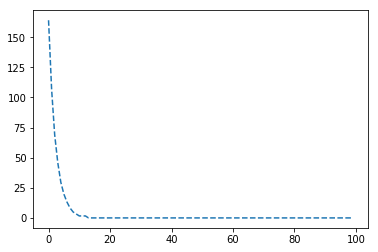

In [4]:
plt.plot(simulation[0], linestyle="dashed")

In [5]:
simulations = {update_type: polarization.run_simulation(
    polarization.build_extreme_beliefs(num_agents),
    polarization.build_inf_graph_2_groups_faint(num_agents, 0.1, 0.5),
    max_time,
    num_bins,
    update_type,
    polarization.CONFBIAS_DISCOUNT,
    polarization.BACKFIRE_BELIEF_THRESHOLD,
    polarization.BACKFIRE_INFLUENCE_THRESHOLD    
) for update_type in polarization.Update}

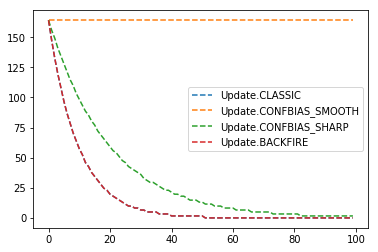

In [6]:
for update_type, values in simulations.items():
    plt.plot(values[0], linestyle="dashed", label=update_type)
plt.legend()

In [7]:
simulations2 = {update_type: polarization.run_simulation(
    polarization.build_mild_beliefs(num_agents, polarization.LOW_POLE, polarization.HIGH_POLE, polarization.BELIEF_STEP),
    polarization.build_inf_graph_2_groups_disconnected(num_agents, 0.5),
    150,
    num_bins,
    update_type,
    polarization.CONFBIAS_DISCOUNT,
    polarization.BACKFIRE_BELIEF_THRESHOLD,
    polarization.BACKFIRE_INFLUENCE_THRESHOLD    
) for update_type in polarization.Update}

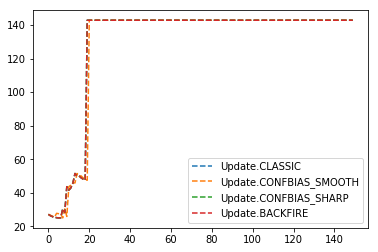

In [8]:
for update_type, values in simulations2.items():
    plt.plot(values[0], linestyle="dashed", label=update_type)
plt.legend()

In [9]:
sim = polarization.run_simulation(
    polarization.build_mild_beliefs(num_agents, polarization.LOW_POLE, polarization.HIGH_POLE, polarization.BELIEF_STEP),
    polarization.build_inf_graph_2_groups_disconnected(num_agents, 0.5),
    100,
    num_bins,
    polarization.Update.BACKFIRE,
    polarization.CONFBIAS_DISCOUNT,
    polarization.BACKFIRE_BELIEF_THRESHOLD,
    polarization.BACKFIRE_INFLUENCE_THRESHOLD    
)

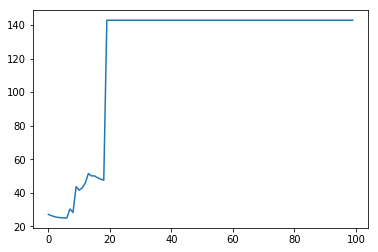

In [10]:
plt.plot(sim[0])

In [11]:
sim[0][99]

142.7825724343806

# Run Simulations

The default parameters are defined as constants in the `polarization.py` module.

- NUM_AGENTS = 100
- LOW_POLE = 0.25
- HIGH_POLE = 0.75
- CONSENSUS_VALUE = 0.5


- NUM_BINS = 201
- ALPHA = 1.6
- K = 1000


- CONFBIAS_DISCOUNT = 0.5
- BACKFIRE_BELIEF_THRESHOLD = 0.4
- BACKFIRE_INFLUENCE_THRESHOLD = 0.2


- CLIQUE_BELIEF_VALUE = 0.5


- GROUPS_DISCONNECTED_BELIEF_VALUE = 0.5


- GROUPS_FAINTLY_BELIEF_VALUE_STRONG = 0.5
- GROUPS_FAINTLY_BELIEF_VALUE_WEAK = 0.1


- INFLUENCERS_BALANCED_OUTGOING_BOTH = 0.6
- INFLUENCERS_BALANCED_INCOMING_BOTH = 0.0
- INFLUENCERS_BALANCED_OTHERS = 0.1


- INFLUENCERS_UNBALANCED_OUTGOING_FIRST = 0.8
- INFLUENCERS_UNBALANCED_OUTGOING_SECOND = 0.5
- INFLUENCERS_UNBALANCED_INCOMING_FIRST = 0.1
- INFLUENCERS_UNBALANCED_INCOMING_SECOND = 0.1
- INFLUENCERS_UNBALANCED_OTHERS = 0.2


In [12]:
pol_history, belief_history = polarization.run_simulation(
    polarization.build_belief(polarization.Belief.MILD),
    polarization.build_influence(polarization.Influence.GROUP_2_FAINT),
    100,
    num_bins,
    polarization.Update.BACKFIRE,
    polarization.CONFBIAS_DISCOUNT,
    polarization.BACKFIRE_BELIEF_THRESHOLD,
    polarization.BACKFIRE_INFLUENCE_THRESHOLD
)

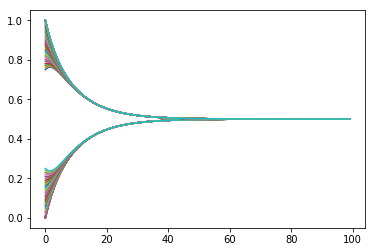

In [13]:
plt.plot(belief_history)
plt.show()

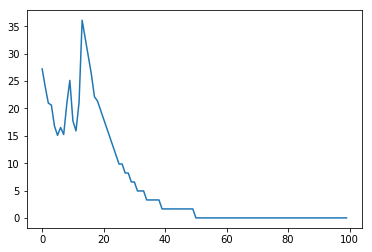

In [14]:
plt.plot(pol_history)

In [15]:
sum(1 if agent > 0.5 else 0 for agent in polarization.build_belief(polarization.Belief.MILD, 101))

50

In [16]:
num_agents = 9
pol_history, belief_history, _ = polarization.run_till_convergence(
    polarization.build_belief(polarization.Belief.MILD, num_agents),
    polarization.build_influence(polarization.Influence.CLIQUE, num_agents),
    update_type=polarization.Update.CLASSIC
)

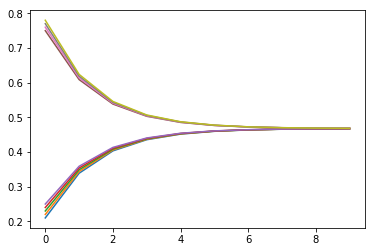

In [17]:
plt.plot(belief_history[:10])
plt.show()

In [18]:
(np.mean(belief_history[0]), max(belief_history[-1]))

(0.4677777777777778, 0.46777777777777785)

In [19]:
num_agents = 9
pol_history, belief_history, _ = polarization.run_till_convergence(
    polarization.build_belief(polarization.Belief.MILD, num_agents),
    polarization.build_influence(polarization.Influence.CLIQUE, num_agents, general_belief=1.0),
    update_type=polarization.Update.CLASSIC
)

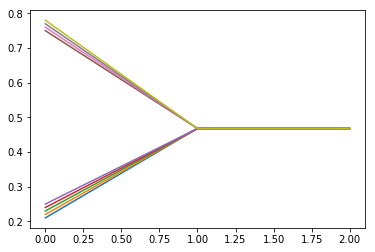

In [20]:
plt.plot(belief_history[:3])
plt.show()

In [21]:
belief_history[1]

array([0.46777778, 0.46777778, 0.46777778, 0.46777778, 0.46777778,
       0.46777778, 0.46777778, 0.46777778, 0.46777778])